17.33 Maximizing diversification ratio

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
rng = np.random.Generator(np.random.MT19937(seed=12345))
n = 20
# _A and _C are internal - you don't need them.
_A = rng.standard_normal((2*n, n))
_C = np.diag(0.5*np.exp(rng.standard_normal((n,))))

Sigma = _C@_A.T@_A@_C
Sigma = 0.5*(Sigma + Sigma.T)
M = np.ones(n)*0.2
sigma = np.sqrt(np.diag(Sigma))

In [9]:
x = cp.Variable(n, nonneg=True)
objective = cp.Minimize(cp.quad_form(x, Sigma))
constraints = [x <= M, sigma.T @ x == 1]
prob = cp.Problem(objective, constraints)
result = prob.solve()
x_max_divers = x.value / np.sum(x.value)
print('x_opt:', ["{:.3f}".format(i) for i in x_max_divers])
print('D(x_opt):', sigma.T @ x_max_divers / ((x_max_divers @ Sigma @ x_max_divers) ** 0.5))

x_opt: ['0.044', '0.006', '0.010', '0.016', '0.000', '0.026', '0.041', '0.009', '0.049', '0.061', '0.012', '0.017', '0.000', '0.066', '0.084', '0.043', '0.012', '0.044', '0.111', '0.348']
D(x_opt): 8.295413176120755


In [14]:
x = cp.Variable(n, nonneg=True)
objective = cp.Minimize(cp.quad_form(x, Sigma))
constraints = [x <= M, cp.sum(x) == 1]
prob = cp.Problem(objective, constraints)
result = prob.solve()
x_min_variance = x.value
print('x_mv:', ['{:.3f}'.format(i) for i in x_min_variance])
print('D(x_mv):', sigma.T @ x_min_variance / ((x_min_variance @ Sigma @ x_min_variance) ** 0.5))

x_mv: ['0.200', '0.002', '0.000', '0.004', '0.000', '0.019', '0.015', '0.044', '0.019', '0.078', '0.006', '0.002', '0.000', '0.165', '0.130', '0.024', '0.015', '0.032', '0.045', '0.200']
D(x_mv): 6.5187205945719935


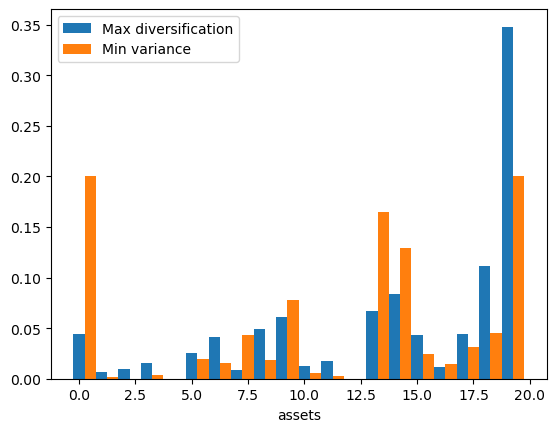

In [17]:
plt.bar(np.arange(0,20), x_max_divers, width=0.5, label="Max diversification")
plt.bar((np.arange(0,20)*2+1)/2, x_min_variance, width=0.5, label="Min variance")
plt.xlabel('assets')
plt.legend()
plt.show()